In [4]:
# Paso 1: Cargar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Paso 2: Cargar el dataset
df = pd.read_csv("data/recetas.csv")
print("Shape:", df.shape)
df.head()

Shape: (100, 16)


,title,servings,readyInMinutes,cookingMinutes,preparationMinutes,healthScore,spoonacularScore,pricePerServing,cheap,dairyFree,glutenFree,sustainable,vegan,vegetarian,veryHealthy,veryPopular
0,Red Lentil Soup with Chicken and Turnips,8,55,45.0,10.0,100.0,99.428001,300.45,False,True,True,False,False,False,True,True
1,Asparagus and Pea Soup: Real Convenience Food,2,20,NaN,NaN,100.0,99.417381,178.37,False,True,True,False,True,True,True,False
2,Garlicky Kale,2,45,NaN,NaN,83.0,98.943375,69.09,False,True,True,False,True,True,True,False
3,Slow Cooker Beef Stew,6,490,480.0,10.0,100.0,98.848091,270.41,False,True,True,False,False,False,True,False
4,Red Kidney Bean Jambalaya,6,45,NaN,NaN,96.0,98.818451,168.43,False,True,True,False,True,True,True,False


In [5]:
# Paso 3: Verificar si hay valores nulos
df.isnull().sum()

title                  0
servings               0
readyInMinutes         0
cookingMinutes        88
preparationMinutes    88
healthScore            0
spoonacularScore       0
pricePerServing        0
cheap                  0
dairyFree              0
glutenFree             0
sustainable            0
vegan                  0
vegetarian             0
veryHealthy            0
veryPopular            0
dtype: int64

<Axes: title={'center': 'Distribución de veryHealthy'}, xlabel='veryHealthy'>

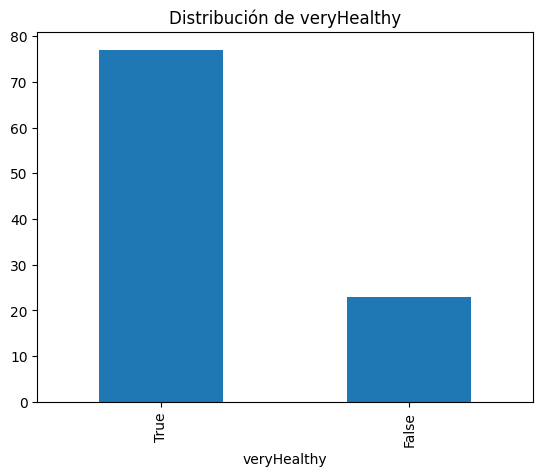

In [6]:
# Paso 4: Análisis básico de la variable objetivo
df["veryHealthy"].value_counts().plot(kind="bar", title="Distribución de veryHealthy")

In [7]:
# Paso 5: Selección de variables

# Variables numéricas
vars_numericas = [
    "servings",
    "readyInMinutes",
    "cookingMinutes",
    "preparationMinutes",
    "healthScore",
    "spoonacularScore",
    "pricePerServing"
]

# Variables categóricas booleanas (que usaremos como features también)
vars_categoricas = [
    "cheap",
    "dairyFree",
    "glutenFree",
    "sustainable",
    "vegan",
    "vegetarian",
    "veryPopular"
]

# Variable objetivo
target = "veryHealthy"

# Selección final
X = df[vars_numericas + vars_categoricas]
y = df[target]

In [8]:
# Paso 6: Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar variables numéricas
scaler = StandardScaler()
X_train[vars_numericas] = scaler.fit_transform(X_train[vars_numericas])
X_test[vars_numericas] = scaler.transform(X_test[vars_numericas])

In [9]:
# Paso 7: Entrenar modelo de clasificación
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Paso 8: Evaluación del modelo
y_pred = model.predict(X_test)

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.83      1.00      0.91         5
        True       1.00      0.93      0.97        15

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.94        20
weighted avg       0.96      0.95      0.95        20


Matriz de Confusión:
[[ 5  0]
 [ 1 14]]


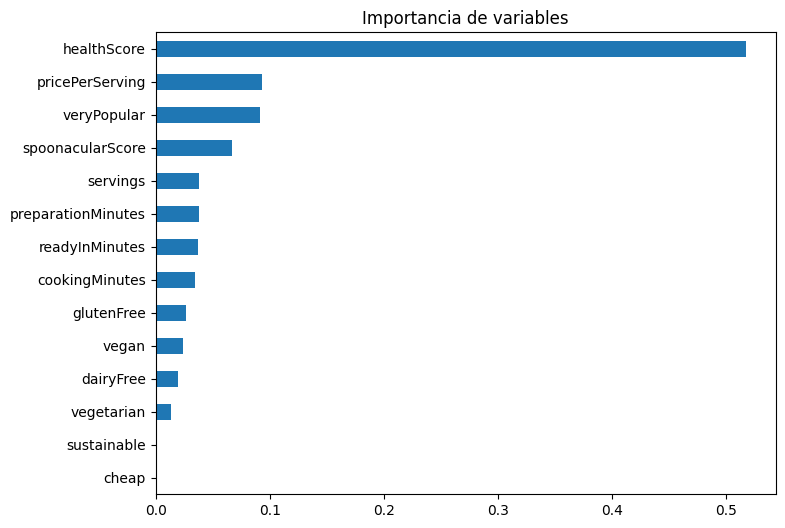

In [11]:
# Paso 9 (opcional): Importancia de las variables
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh", figsize=(8, 6), title="Importancia de variables")
plt.show()

In [12]:
df["veryHealthy"].value_counts()

veryHealthy
True     77
False    23
Name: count, dtype: int64